<h1 style="text-align: center">Data Preprocessing</h1>

## About data
Every two years, the City of Somerville sends out a happiness survey to a random sample of Somerville residents. The survey asks residents to rate their personal happiness, wellbeing, and satisfaction with City services. The combined dataset includes the survey responses from 2011 to 2021. The dataset is intended for public access and can be found on many websites ([official source](https://data.somervillema.gov/Happiness/Somerville-Happiness-Survey-Responses/bi8e-5vw8)). More information about the Happiness Survey is on the [City of Somerville website](https://www.somervillema.gov/departments/mayors-office/somerstat).

## Data cleaning

The entire dataset consists of 80 columns with 10744 entries therefore removing unnecessary data and handling missing values was inevitable. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading database from .csv
raw_df = pd.read_csv('data/Somerville_Happiness_Survey_Responses.csv')

# Displaying informations about database
raw_df.info()
raw_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10744 entries, 0 to 10743
Data columns (total 80 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Combined_ID                                                                                   10744 non-null  int64  
 1   Year                                                                                          10744 non-null  int64  
 2   How.happy.do.you.feel.right.now                                                               10522 non-null  float64
 3   How.satisfied.are.you.with.your.life.in.general                                               10516 non-null  float64
 4   How.satisfied.are.you.with.Somerville.as.a.place.to.live                                      4499 non-null   float64
 5   In.general..how.similar.a

/tmp/ipykernel_29898/944960539.py:2: DtypeWarning: Columns (42,43,65,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('data/Somerville_Happiness_Survey_Responses.csv')


,Combined_ID,Year,How.happy.do.you.feel.right.now,How.satisfied.are.you.with.your.life.in.general,How.satisfied.are.you.with.Somerville.as.a.place.to.live,In.general..how.similar.are.you.to.other.people.you.know,When.making.decisions..are.you.more.likely.to.seek.advice.or.decide.for.yourself,How.satisfied.are.you.with.your.neighborhood,How.proud.are.you.to.be.a.Somerville.resident,How.would.you.rate.the.following..The.availability.of.information.about.city.services,...,comments_survey_complaints_political,comments_transportation_roads_locations,comments_living_prices,comments_natural_physical_beauty,comments_noise_youth_complaints,comments_city_events_structures,comments_health_concerns,comments_public_safety,comments_elaboration_general,comments_misc
0,1,2011,8.0,5.0,5.0,3.0,10.0,8.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,2011,7.0,8.0,9.0,7.0,8.0,9.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,3,2011,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,4,2011,10.0,10.0,10.0,9.0,10.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,5,2011,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


### Columns reduction and renaming

To begin with, from the entire database we selected only those columns that are meaningful to us and replaced their names with shorter ones. We also limited the scope of the data to those from 2021.

In [58]:
desired_columns = ["How.satisfied.are.you.with.your.life.in.general",
                  "How.satisfied.are.you.with.your.neighborhood",
                  "How.satisfied.are.you.with.the.condition.of.your.housing",
                  "How.would.you.rate.the.following..The.availability.of.social.community.events",
                  "How.safe.do.you.feel.walking.in.your.neighborhood.at.night",
                  "Do.you.have.children.age.18.or.younger.who.live.with.you",
                  "What.is.your.annual.household.income",
                  "disability_yn",
                  "What.is.your.gender",
                  "Age"]  

translation_dict = {"How.satisfied.are.you.with.your.life.in.general" : "Life satisfaction",
                    "How.satisfied.are.you.with.your.neighborhood" : "Neighborhood satisfaction",
                    "How.satisfied.are.you.with.the.condition.of.your.housing" : "Housing satisfaction",
                    "How.would.you.rate.the.following..The.availability.of.social.community.events" : "Community events availability",
                    "How.safe.do.you.feel.walking.in.your.neighborhood.at.night" : "Sense of security",
                    "Do.you.have.children.age.18.or.younger.who.live.with.you" : "Living with children under 18",
                    "What.is.your.annual.household.income" : "Annual household income",
                    "disability_yn" : "Disability",
                    "What.is.your.gender" : "Gender",
                    "Age" : "Age"}

# Selecting specific columns with rows only from 2021 
trimed_df = raw_df.loc[raw_df['Year'] == 2021, desired_columns]

# Renaming long column names to short ones
trimed_df = trimed_df.rename(columns = translation_dict)

# Displaying informations about database
trimed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298 entries, 9446 to 10743
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Life satisfaction              1265 non-null   float64
 1   Neighborhood satisfaction      1277 non-null   float64
 2   Housing satisfaction           1258 non-null   float64
 3   Community events availability  1197 non-null   float64
 4   Sense of security              1255 non-null   float64
 5   Living with children under 18  1268 non-null   object 
 6   Annual household income        1182 non-null   object 
 7   Disability                     1259 non-null   object 
 8   Gender                         1259 non-null   object 
 9   Age                            1239 non-null   object 
dtypes: float64(5), object(5)
memory usage: 111.5+ KB


### Handling missing values

In our project, the most relevant parameter is the level of life satisfaction. For this reason, we had to remove all rows in which the value for this column was unknown (NaN). In addition, we also checked the other columns for missing data.

In [59]:
# Dropping rows with missing values in one specific column (Life satisfaction)
trimed_df = trimed_df.dropna(subset = ['Life satisfaction'])

# Checking how many missing values are in each column
nan_values_count = trimed_df.isna().sum().sort_values(ascending = False)
info_df = pd.DataFrame(data = {"Column" : nan_values_count.index, "Null Count" : nan_values_count.values})

# Displaying informations about database
display(info_df)
print("Number of all null values: {}".format(nan_values_count.values.sum()))
num_of_null_in_rows = trimed_df.isnull().sum(axis = 1)
print("Number of rows with at least one null value: {}".format(len(trimed_df[num_of_null_in_rows>0].index)))

,Column,Null Count
0,Annual household income,102
1,Community events availability,81
2,Age,49
3,Disability,32
4,Gender,32
5,Sense of security,25
6,Living with children under 18,23
7,Housing satisfaction,20
8,Life satisfaction,0
9,Neighborhood satisfaction,0


Number of all null values: 364
Number of rows with at least one null value: 216


There are 364 remaining null values in the dataset located in 216 rows. Since our current dataset still has a lot of entries (~1300) we can remove all rows containing at least one null value.

In [60]:
# Dropping all rows with missing values
clean_df = trimed_df.dropna()

# Resetting indexes
clean_df = clean_df.reset_index(drop = True)

# Displaying informations about database
clean_df.info()
clean_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Life satisfaction              1049 non-null   float64
 1   Neighborhood satisfaction      1049 non-null   float64
 2   Housing satisfaction           1049 non-null   float64
 3   Community events availability  1049 non-null   float64
 4   Sense of security              1049 non-null   float64
 5   Living with children under 18  1049 non-null   object 
 6   Annual household income        1049 non-null   object 
 7   Disability                     1049 non-null   object 
 8   Gender                         1049 non-null   object 
 9   Age                            1049 non-null   object 
dtypes: float64(5), object(5)
memory usage: 82.1+ KB


,Life satisfaction,Neighborhood satisfaction,Housing satisfaction,Community events availability,Sense of security,Living with children under 18,Annual household income,Disability,Gender,Age
0,9.0,9.0,9.0,5.0,9.0,no,"$75,000 to $99,999",no,Female,55-64
1,8.0,7.0,6.0,4.0,6.0,no,"$75,000 to $99,999",yes,Male,65-74
2,7.0,8.0,3.0,4.0,5.0,no,"$50,000 to $74,999",no,Female,25-34
3,3.0,8.0,8.0,1.0,4.0,no,"$50,000 to $74,999",no,Female,35-44
4,5.0,7.0,7.0,4.0,7.0,yes,"$100,000 to $149,999",no,Male,55-64


### Data transformation

For future analysis, conversion of "Annual household income" data to numeric values was required. To do this, Midpoint Coding was used, which involves assigning each category an average value from the range they represent.

In [61]:
print("Unique 'Annual household income' values before coding:\n{}".format(clean_df['Annual household income'].unique()))

# Mapping dictionary 
income_map = {"Less than $10,000" : 5000.0,
              "$10,000 to $24,999" : 17499.5,
              "$25,000 to $49,999" : 37499.5,
              "$50,000 to $74,999" : 62499.5,
              "$75,000 to $99,999" : 87499.5,
              "$100,000 to $149,999" : 124999.5,
              "$150,000 to $199,999" : 174999.5,
              "$200,000 or more" : 210000.0}

# Replacing categories with mean value of range which they represented
clean_df['Annual household income'].replace(to_replace = income_map, inplace = True)

print("\nUnique 'Annual household income' values after coding:\n{}".format(clean_df['Annual household income'].unique()))

Unique 'Annual household income' values before coding:
['$75,000 to $99,999' '$50,000 to $74,999' '$100,000 to $149,999'
 '$150,000 to $199,999' '$200,000 or more' 'Less than $10,000'
 '$25,000 to $49,999' '$10,000 to $24,999']

Unique 'Annual household income' values after coding:
[ 87499.5  62499.5 124999.5 174999.5 210000.    5000.   37499.5  17499.5]


Unlike previous case - features "Living with children under 18" and "Disability" are nominal (do not have any order). Therefore,  One Hot Encoding was used to mapp each category with a binary variable containing either 0 or 1.

In [62]:
# 'Living with children under 18' column encoding
living_with_children_enc = pd.get_dummies(data = clean_df['Living with children under 18'], drop_first=True)
living_with_children_enc.rename(columns = {'yes' : 'Living with children under 18'}, inplace=True)

print("Unique 'Living with children under 18' values before coding:\n{}".format(clean_df['Living with children under 18'].unique()))
clean_df = clean_df.drop('Living with children under 18', axis=1)
clean_df = pd.concat([clean_df, living_with_children_enc], axis=1)
print("\nUnique 'Living with children under 18' values after coding:\n{}".format(clean_df['Living with children under 18'].unique()))

# 'Disability' column encoding
disability_enc = pd.get_dummies(data = clean_df['Disability'], drop_first=True)
disability_enc.rename(columns = {'yes' : 'Is disabled'}, inplace=True)

print("\nUnique 'Disability' values before coding:\n{}".format(clean_df['Disability'].unique()))
clean_df = clean_df.drop('Disability', axis=1)
clean_df = pd.concat([clean_df, disability_enc], axis=1)
print("\nUnique 'Is disabled' values after coding:\n{}".format(clean_df['Is disabled'].unique()))

Unique 'Living with children under 18' values before coding:
['no' 'yes']

Unique 'Living with children under 18' values after coding:
[0 1]

Unique 'Disability' values before coding:
['no' 'yes']

Unique 'Is disabled' values after coding:
[0 1]


For last 2 ordered cetegorical features "Age" and "Gender", Ordinal Encoding was used.

In [63]:
## 'Age' column encoding
print("\nUnique 'Age' values before coding:\n{}".format(clean_df['Age'].unique()))

# Mapping dictionary 
age_map = {"17 or younger" : 1,
           "18-24" : 2,
           "25-34" : 3,
           "35-44" : 4,
           "45-54" : 5,
           "55-64" : 6,
           "65-74" : 7,
           "75+" : 8}

# Replacing categories with ordinal encdoded values
clean_df['Age'].replace(to_replace = age_map, inplace = True)

print("\nUnique 'Age' values after coding:\n{}".format(clean_df['Age'].unique()))


## 'Gender' column encoding
print("\nUnique 'Gender' values before coding:\n{}".format(clean_df['Gender'].unique()))

# Mapping dictionary 
gender_map = {"Female" : 1,
              "Male" : 2,
              "Multiple people" : 3,
              "Nonbinary" : 4}

# Replacing categories with ordinal encdoded values
clean_df['Gender'].replace(to_replace = gender_map, inplace = True)

print("\nUnique 'Gender' values after coding:\n{}".format(clean_df['Gender'].unique()))


Unique 'Age' values before coding:
['55-64' '65-74' '25-34' '35-44' '18-24' '75+' '45-54' '17 or younger']

Unique 'Age' values after coding:
[6 7 3 4 2 8 5 1]

Unique 'Gender' values before coding:
['Female' 'Male' 'Multiple people' 'Nonbinary']

Unique 'Gender' values after coding:
[1 2 3 4]


At the end data types of individual columns have been changed.

In [64]:
# Dictionary for specific columns convertion
convert_dict = {"Life satisfaction": int,
                "Neighborhood satisfaction": int,
                "Housing satisfaction" : int,
                "Community events availability" : int,
                "Sense of security" : int}

# Changing column types using dictionary
final_df = clean_df.astype(convert_dict)

# Displaying informations about database
display(final_df.dtypes)

Life satisfaction                  int64
Neighborhood satisfaction          int64
Housing satisfaction               int64
Community events availability      int64
Sense of security                  int64
Annual household income          float64
Gender                             int64
Age                                int64
Living with children under 18      uint8
Is disabled                        uint8
dtype: object

## Summary

In the end, data preprocessing resulted in a set with 10 columns and 1049 entries. In order to achieve this, a number of operations were necessary, such as reducing the dimensions of the database, getting rid of rows/columns with missing values, and transforming some features into other data types. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Life satisfaction              1049 non-null   int64  
 1   Neighborhood satisfaction      1049 non-null   int64  
 2   Housing satisfaction           1049 non-null   int64  
 3   Community events availability  1049 non-null   int64  
 4   Sense of security              1049 non-null   int64  
 5   Annual household income        1049 non-null   float64
 6   Gender                         1049 non-null   int64  
 7   Age                            1049 non-null   int64  
 8   Living with children under 18  1049 non-null   uint8  
 9   Is disabled                    1049 non-null   uint8  
dtypes: float64(1), int64(7), uint8(2)
memory usage: 67.7 KB


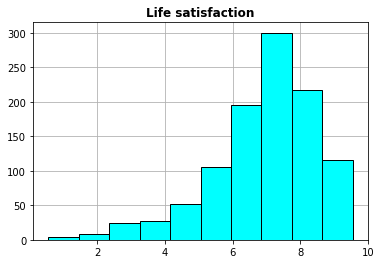

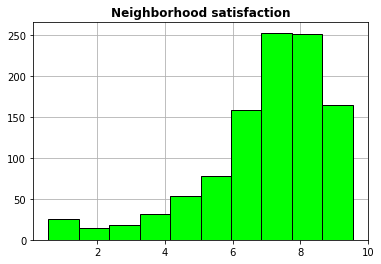

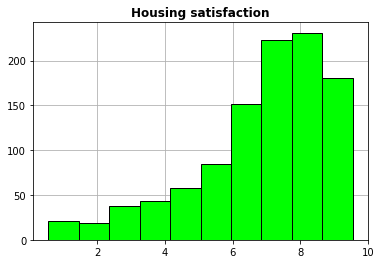

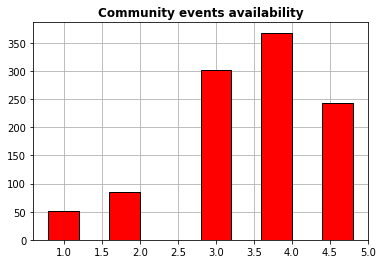

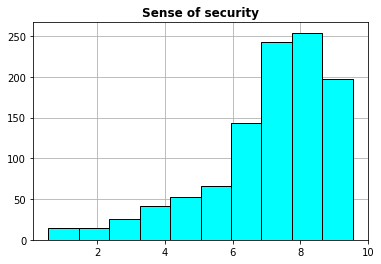

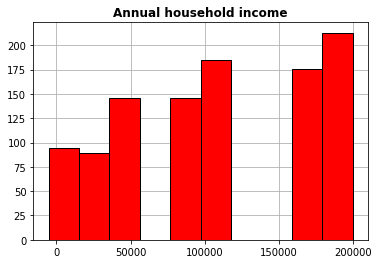

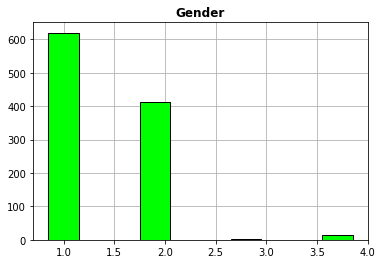

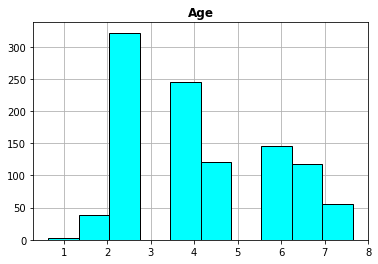

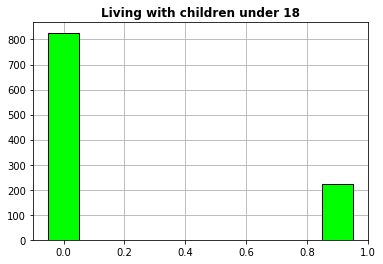

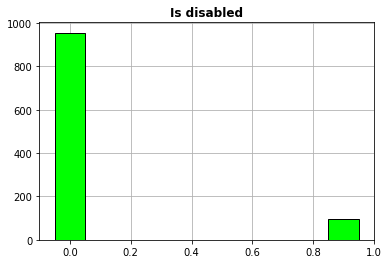

In [65]:
# Displaying informations about database
final_df.info()

# Iterate over columns of dataFrame and plot histogram for each of it
for (colname, colval) in final_df.iteritems():
    plt.figure()
    plt.hist(colval.values, align='left', color=np.random.choice(['lime', 'cyan', 'red']), edgecolor="black", zorder=3)
    plt.title(colname, fontweight="bold")
    plt.grid(zorder=0)
    plt.show()

In [66]:
# Saving the newly created dataset to a .scv file
# final_df.to_csv(path_or_buf = 'data/Somerville_Happiness_processed.csv', sep = ',', index = False)